<a href="https://colab.research.google.com/github/POJSpace/Deep_learning_pytorch/blob/main/resources/02_Sigmoid_POJSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sigmoid
Vytvořil jsem pro vás tenhle notebook aby jste si vyzkoušeli a koukli se na to jak funguje funkce sigmoid
Můžete se kouknout jak různě se mění hodnoty při změně funkce.

In [322]:
import torch
import matplotlib.pyplot as plt

In [323]:
# Vytvoříme si metodu na vykreslení sigmoidu
# TOHLE NEMUSÍTE CHÁPAT ALE JINAK TO JE JEN MATIKA ;)
def plt_sigmoid(
    x : torch.Tensor,
    y : torch.Tensor,
    x_compare : torch.Tensor = torch.zeros(1),
    y_compare : torch.Tensor = torch.zeros(1)):

  """TOHLE NEMUSÍTE CHÁPAT ALE JINAK TO JE JEN MATIKA ;)"""

  plt.figure(figsize=(10,7))
  plt.grid(zorder = 1)  # vytvoříme si mřížku, zorder znamená v jakém pořadí se to bude zobrazovat, at není mřížka nad tečkama

  plt.scatter(x, y, c = "b", s = 20, label = "Sigmoid", zorder = 2) # vykreslíme náš sigmoid

  if x_compare.numel() != 1 and y_compare.numel() != 1: # porovnáme jestli máme nějaké tenzory k porovnání pomocí numel -- hodí 1 když je prázdný
    plt.scatter(x_compare, y_compare, c = "g", s = 20, label = "Sigmoid fo Comparasion") # když chceme porovnat vykreslíme druhý sigmoid

    # porovnáme jestli hodnoty na porovnání jsou větší jak ty původní a jestli ano tak je přepíšeme aby se nám dobře vygenerovala mřížka
    if x_compare.max() > x.max():
      x = x_compare
    if y_compare.max() > y.max():
      y = y_compare

  inx = torch.tensor([i for i in range(len(x)) if i%(round(len(x)/20))==0]) #je to celkem složité ale když to rozpitváte tak není, ve zkratce to dělá to že to vezme počet čísel vydělí to 20 a zaokrouhlí to a to je velikost stepu (kolik se nám bude zobrazovat x)
  iny = torch.arange(y.min() , y.max()+0.1, round(y.max().item() /10, 2)) # to samé akorát s y když je to od 0 - 10 tak se to bude zobrazovat po 1 a když od 0 - 1 tak po 0.1
  plt.xticks(torch.index_select(x, 0, inx), zorder = 1) # zobrazí se x axis
  plt.yticks(iny, zorder = 1)# zobrazí se y axis

  # vyberu každý 10 prvek a zakreslím ho na x.axis
  plt.legend(prop={"size": 10})


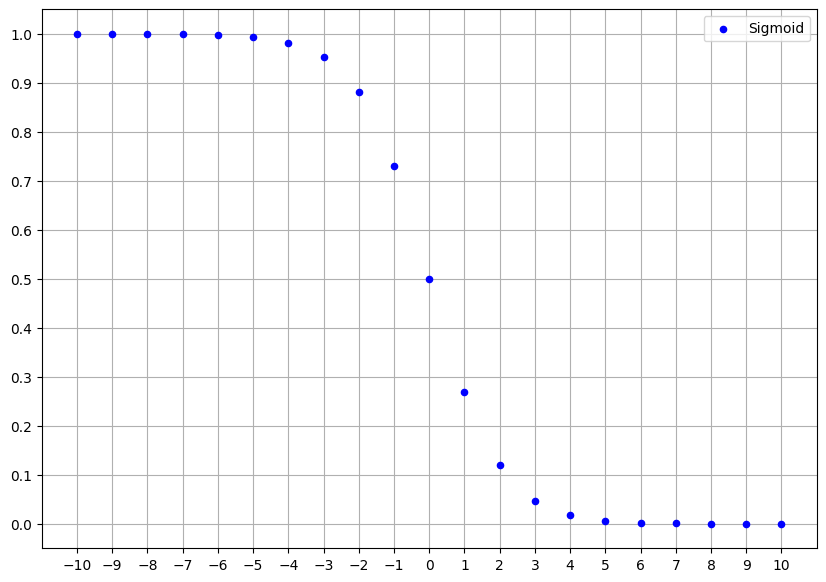

In [324]:
# Vytvoříme si základní tensor X
x = torch.arange(-10,11,1)

# Vytvoříme si funkci Sigmoid
y = 1 / (1 + torch.exp(x))

# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y)

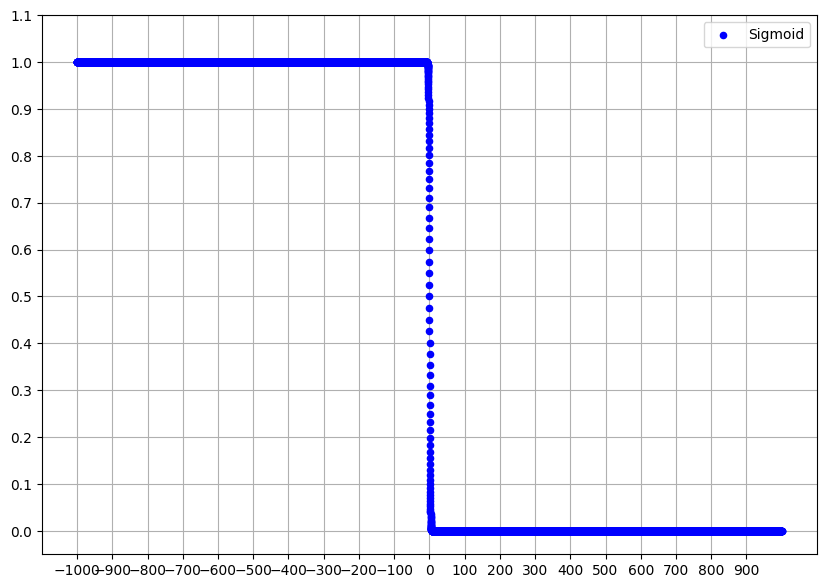

In [325]:
# Vytvoříme si Obrovský sigmoid
x = torch.arange(-1000,1000,0.1)

# Vytvoříme si funkci Sigmoid
y = 1 / (1 + torch.exp(x))

# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y)

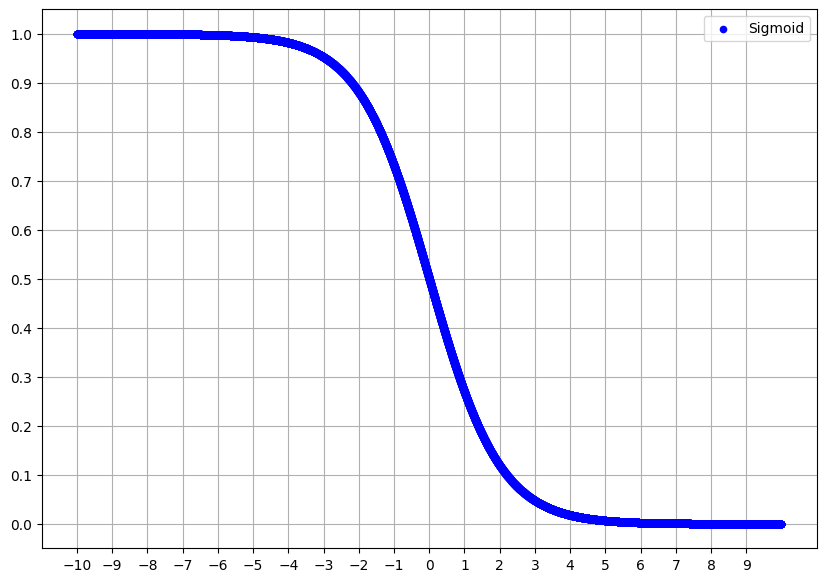

In [326]:
# Vytvoříme si malý sigmoid s hodně daty
x = torch.arange(-10,10,0.001)

# Vytvoříme si funkci Sigmoid
y = 1 / (1 + torch.exp(x))

# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y)

(tensor(0.3010), tensor(0.5000))

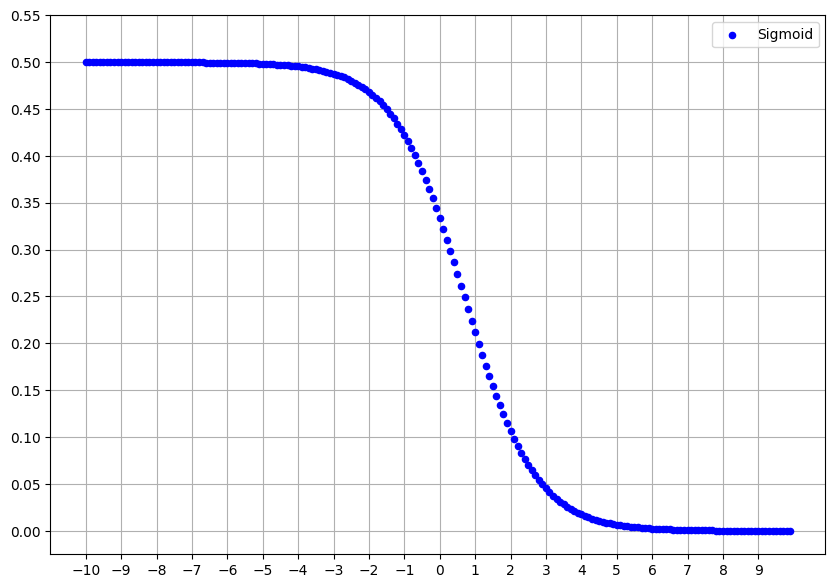

In [327]:
# Vytvoříme si základní tensor X
x = torch.arange(-10,10,0.1)

# Vytvoříme si funkci Sigmoid + Protože jsme dali 1 / *2* + torch.exp(x) : tak se stalo to že sigmoid se podělil na polovinu, proto teď převádí čísla od 0 - 0.5, a taky se posunul jeho střed a už není 0 ale
y = 1 / (2 + torch.exp(x))

# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y)

# můžeme si vypočítat aji jeho střed, to znamená že chceme zjistit hodnout x a víme hodnotu y která je max hodnota / 2
mid = torch.log10(1/y.max()) # <- jednoduché vyjádření ze vzorce y = 1/ 1 + e**x => e**x = 1/y => x * log e = 1 * log 1/y => x = log 1/y
mid, y.max()

Střed Sigmoidu je: tensor(-0.9998)


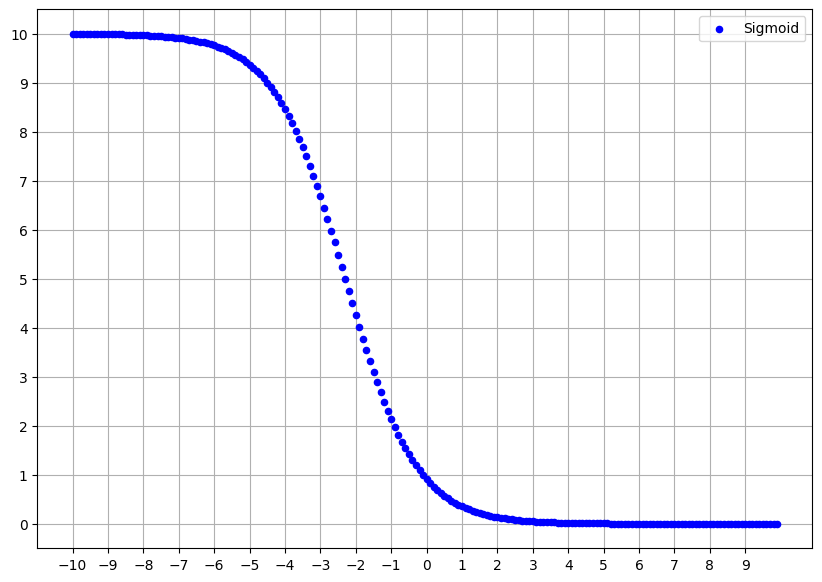

In [328]:
# Vytvoříme si základní tensor X
x = torch.arange(-10,10,0.1)

# Vytvoříme si funkci Sigmoid + Protože jsme dali 1 / *0.1* + torch.exp(x) : tak se stalo to že sigmoid se posunul a jeho střed je teď na polovinu, proto teď převádí čísla od 0 - 0.5
y = 1 / (0.1 + torch.exp(x))

# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y)
mid = torch.log10(1/y.max())
print("Střed Sigmoidu je:", mid)

Střed Sigmoidu1 je:  tensor(1.9725e-05)  Střed Sigmoidu2 je:  tensor(-0.5962)


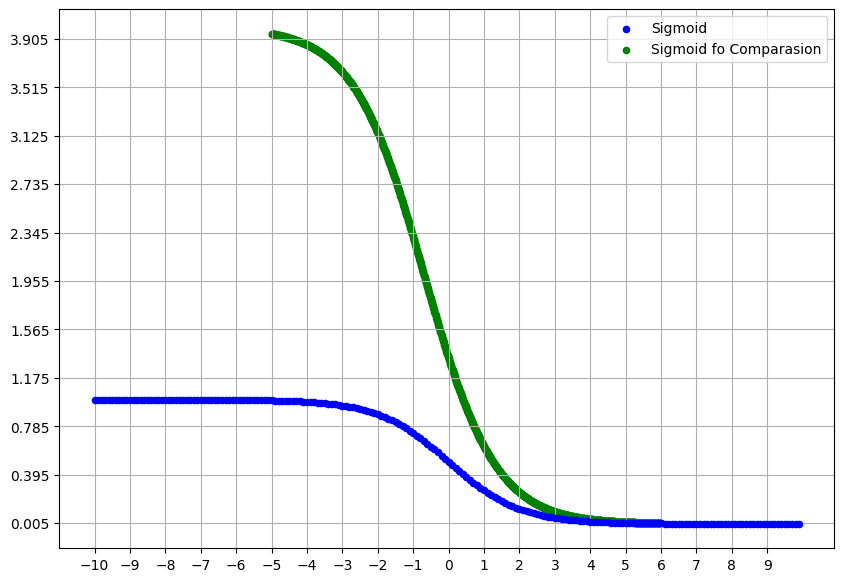

In [329]:
# vytvoříme si 2 zkoušecí tenzory které si můžete libovolně upravovat a porovnávat je
# X Y
x = torch.arange(-10,10,0.1)

y = 1 / (1 + torch.exp(x))

# A B
a = torch.arange(-5,6,0.01)

b = 2 / (0.5 + torch.exp(a))



# Zobrazíme si náš Sigmoid
plt_sigmoid(x, y, a, b)

mid1 = torch.log10(1/y.max())
mid2 = torch.log10(1/b.max())
print("Střed Sigmoidu1 je: ", mid1, " Střed Sigmoidu2 je: ", mid2)
